# Project: Wrangling and Analyze Data

In [2]:
#import all liberary needed
import requests
import os
import csv
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
if not os.path.exists('image_predictionss.tsv'):
    url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
    r = requests.get(url)
    with open('image_predictionss.tsv', 'wb') as file:
        file.write(r.content)

In [5]:
image_pre=pd.read_csv('image_predictionss.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
if not os.path.exists('tweet_json.txt'):
    url='https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
    response=requests.get(url)
    data=response.text
    filename='tweet_json'
    with open(filename + '.txt',"wb") as file:
        file.write(response.content)

In [7]:
with open('tweet_json.txt')as file:
    twitter_count=pd.read_json(file, lines=True,encoding='utf-8')

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [10]:
image_pre.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1855,841314665196081154,https://pbs.twimg.com/ext_tw_video_thumb/84131...,1,Afghan_hound,0.903712,True,Saluki,0.035215,True,bloodhound,0.026565,True
990,707995814724026368,https://pbs.twimg.com/media/CdNOb17WwAA5z4A.jpg,1,agama,0.172087,False,Gila_monster,0.126978,False,lumbermill,0.050400,False
1035,711743778164514816,https://pbs.twimg.com/media/CeCfMPDW0AAAEUj.jpg,1,Lakeland_terrier,0.459515,True,miniature_poodle,0.219661,True,standard_poodle,0.130189,True
1518,787397959788929025,https://pbs.twimg.com/media/Cu1mQsDWEAAU_VQ.jpg,1,Chihuahua,0.900483,True,toy_terrier,0.021084,True,miniature_pinscher,0.019484,True
2024,881666595344535552,https://pbs.twimg.com/media/DDxPFwbWAAEbVVR.jpg,1,Saluki,0.529012,True,Afghan_hound,0.250003,True,golden_retriever,0.160739,True


In [11]:
twitter_count.head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


#### Visual Assesment
twitter_archive table
1. So many  nan value in column in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
2. source column as some web_browser content
3. doggo/floofer/pupper/puppo: four columns for one variable
4. Single lowercase letter ('a') in the name column instead of None
image_pre table
1. inconsistence naming of breed in p1,p2,p3 columns
2. The p1/p2/p3 and p1_conf,p2_conf,p3_conf should assigned to two columns instead of nine columns
twitter_count table
1. inconsistent column name i.e created at,id,fulltext column


#### programmatic assesment


In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### issue spotted
1. so many null value in in_reply columns, retweeted columns, and the expanded url has null
2. rating numerator and denominator columns has 0 as a value
3. some rating denominator are > 10 while some are < 10
4. invalid datatypes in timestamp,retweeted_status_timestamp, tweet_id
5. Invalid data: the project brief specified only original tweets, so the 78 replies and 181 retweets (and any others) are not needed for this project.

In [14]:
image_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
image_pre.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
twitter_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [17]:
twitter_count.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


#### issue spotted
So many columns which are not actually needed
retweeted_count,favorite_columns has 0 as an entry

In [18]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [19]:
twitter_archive[~twitter_archive.name.str.istitle()].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ'],
      dtype=object)

#### issue spotted
weird naming of dog in name column

In [20]:
twitter_archive[twitter_archive.rating_numerator ==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


0 rating numerator , althoug this can be overlooked

In [21]:
image_pre[image_pre['jpg_url'].duplicated()]
image_pre[image_pre['jpg_url']=='https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
587,679062614270468097,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True


#### issue spotted
duplicated image with different tweet-id

## Summary

### Quality issues
1. merge the archive table and count table to correct to complete the tweet achive table

2. many null values at the in_reply_to status_id,retweeted_status_id, and eliminate the rows with 0 retweet_count and favorite_count

3.  a href tag at the source column, is not actually needed, we only neeed the media to which the tweet was sent

4. The rating numerator with decimals are not properly extracted, we can extract this from the text columns using regrex function

5. some dogs as weird name like a, an, etc

6. at the dog name, dog stage the null value are written as None

7. inconsistent naming of breed, some are written in title format

8. Duplicated images at jpg_url column with different tweet_id

9. change the data type of tweet_id to string

### Tidiness issues
1. Merging the 'doggo','floofer','pupper','puppo' in dog_stage column

2. Mergin the p1,p2,p3,and there respective confidence into two column
3. merging the image_prediction table with the resulted twitter_archive table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [107]:
# Make copies of original pieces of data
twitter_archive_clean=twitter_archive.copy()
image_pre_clean=image_pre.copy()
twitter_count_clean=twitter_count.copy()


In [108]:
twitter_count_clean=twitter_count_clean[['id','is_quote_status','retweet_count','favorite_count','favorited','retweeted']]

### Issue #1:


#### Define:
merge the archive table and count table to correct the missing values

#### Code

In [109]:
twitter_archive_clean=pd.merge(twitter_archive_clean,twitter_count_clean,how='left', right_on='id',left_on='tweet_id')

In [110]:
twitter_archive_clean.drop('id',axis=1, inplace=True)

In [111]:
twitter_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,is_quote_status,retweet_count,favorite_count,favorited,retweeted
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,Phineas,None,None,None,None,False,8853.0,39467.0,False,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Tilly,None,None,None,None,False,6514.0,33819.0,False,False


#### Define
fill all null value at favorite_count,retweet_count with 0
correct data type at timestamp,retweet_count,favorite_count,retweeted,favorited,is_quote_status 

In [112]:
twitter_archive_clean.retweet_count=twitter_archive_clean.retweet_count.fillna(0).astype(int)
twitter_archive_clean.favorite_count=twitter_archive_clean.favorite_count.fillna(0).astype(int)
twitter_archive_clean.retweeted=twitter_archive_clean.retweeted.astype(bool)
twitter_archive_clean.favorited=twitter_archive_clean.favorited.astype(bool)
twitter_archive_clean.is_quote_status=twitter_archive_clean.is_quote_status.astype(bool)


In [113]:
twitter_archive_clean.timestamp=twitter_archive_clean.timestamp.apply(pd.to_datetime,errors='coerce',infer_datetime_format=True)
twitter_archive_clean.retweeted_status_timestamp=twitter_archive_clean.retweeted_status_timestamp.apply(pd.to_datetime,errors='coerce',infer_datetime_format=True)

#### Test

In [114]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2:
many null values at the in_reply_to status_id,retweeted_status_id, and eliminate the rows with 0 retweet_count and favorite_count


#### Define
Delete all the values in the retweeted columns so as to rectify the 0 values in favorite_count and retweet_count.
the 0 can possibly be for retweeted dogs

#### Code

In [115]:
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean['retweeted']==False]
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean['is_quote_status']==False]
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean['favorited']==False]
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean['in_reply_to_status_id'].isnull()]
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

#### Test

In [116]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2063 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2063 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2063 non-null   datetime64[ns, UTC]
 4   source                      2063 non-null   object             
 5   text                        2063 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2060 non-null   object             
 10  rating_numerator            2063 non-null   int64           

In [117]:
twitter_archive_clean[twitter_archive_clean['retweet_count']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,is_quote_status,retweet_count,favorite_count,favorited,retweeted


In [118]:
twitter_archive_clean[twitter_archive_clean['favorite_count']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,is_quote_status,retweet_count,favorite_count,favorited,retweeted


#### Define
Drop all the in reply,retweeted status, favorited and retweeted columns

##### Code

In [119]:
drop_col=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','is_quote_status','retweeted_status_timestamp','favorited','retweeted']

In [120]:
twitter_archive_clean.drop(drop_col,axis=1,inplace=True)

#### Test

In [121]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'retweet_count', 'favorite_count'],
      dtype='object')

In [122]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2063 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2063 non-null   int64              
 1   timestamp           2063 non-null   datetime64[ns, UTC]
 2   source              2063 non-null   object             
 3   text                2063 non-null   object             
 4   expanded_urls       2060 non-null   object             
 5   rating_numerator    2063 non-null   int64              
 6   rating_denominator  2063 non-null   int64              
 7   name                2063 non-null   object             
 8   doggo               2063 non-null   object             
 9   floofer             2063 non-null   object             
 10  pupper              2063 non-null   object             
 11  puppo               2063 non-null   object             
 12  retweet_count       2063 non-null 

#### Define
extract rating_numerator with decimal,  the text column should only have text content. i.e dog description

#### Code

In [123]:

ratings =twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r"(\d+\.\d*(?=\/\d+))")
twitter_archive_clean.loc[ratings.index, 'rating_numerator'] = ratings.values
twitter_archive_clean.rating_numerator=twitter_archive_clean.rating_numerator.astype(float)



C:\Users\kafayat\AppData\Local\Temp\ipykernel_22284\1952544521.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ratings =twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r"(\d+\.\d*(?=\/\d+))")


#### Test

In [124]:
twitter_archive_clean.loc[ratings.index]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
45,883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.50,10,Bella,None,None,None,None,10407,46860
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None,7069,20296
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,None,None,pupper,None,1885,7320
1712,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,None,None,None,None,542,1879


#### Code

In [125]:
twitter_archive_clean.text = twitter_archive_clean.text.str.extract('(.+(?=\s\d+/\d+\s))')

#### Test

In [126]:
twitter_archive_clean.text[2314]

'This is a golden Buckminsterfullerene named Johm. Drives trucks. Lumberjack (?). Enjoys wall.'

#### Define
Extract tweet source from source column using python function and apply method in pandas and convert it to categorical

##### Code

In [127]:
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1930
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [128]:
#define a function that extract tweet source from the whole column
def tweet_source(x):
    'x is an a href string from the source column in df_arch_cleaned dataset '
    # find the first close tag
    a=x.find('>')+1
    #find the first close tag
    b=x[a:].find('<')
    #extract the text in between
    return x[a:][:b]
    

In [129]:
twitter_archive_clean.source=twitter_archive_clean.source.apply(lambda x: tweet_source(x)).astype('category')

#### Test

In [130]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone     1930
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### Define
in the data set we have some rows which rating denominator is!= 10
using find method,to check the actual denominator on a spread sheet using the tweet_id some numerator and denominators are not
i assigned the value manually to correct the mistake, and resign 10 as the constant rating denominator values for others which i cant find on excel sheet

#### Code

In [131]:
twitter_archive_clean[twitter_archive_clean['rating_denominator']!=10][['tweet_id','text','expanded_urls','rating_numerator','rating_denominator']]

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84.0,70
516,810984652412424192,Meet Sam. She smiles,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7
902,758467244762497024,Why does this never happen at my front door...,https://twitter.com/dog_rates/status/758467244...,165.0,150
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9.0,11
1120,731156023742988288,Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204.0,170
1165,722974582966214656,Happy 4/20 from the squad!,https://twitter.com/dog_rates/status/722974582...,4.0,20
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50.0,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench.,https://twitter.com/dog_rates/status/713900603...,99.0,90
1254,710658690886586372,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80.0,80
1274,709198395643068416,None know where camera is.,https://twitter.com/dog_rates/status/709198395...,45.0,50


In [133]:
twitter_archive_clean.loc[1165,['rating_numerator','rating_denominator']]=13,10
twitter_archive_clean.loc[1068,['rating_numerator','rating_denominator']]=14,10
twitter_archive_clean.loc[1202,['rating_numerator','rating_denominator']]=11,10
twitter_archive_clean.loc[1662,['rating_numerator','rating_denominator']]=10,10
twitter_archive_clean.loc[2335,['rating_numerator','rating_denominator']]=9,10

In [141]:
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean['rating_denominator']==10]

In [142]:
twitter_archive_clean[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,1934.000000,1934.0
mean,11.710962,10.0
std,41.260415,0.0
min,0.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,1776.000000,10.0


#### Define
Remove any rows not related to dog


In [137]:
# revove all rows that the text is null
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.text.isnull()]

In [138]:
twitter_archive_clean = twitter_archive_clean.loc[~twitter_archive_clean.text.str.match('.*only rate dogs')]

In [139]:
twitter_archive_clean.loc[twitter_archive_clean.text.str.match('.*only rate dogs')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count


In [143]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1934 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1934 non-null   int64              
 1   timestamp           1934 non-null   datetime64[ns, UTC]
 2   source              1934 non-null   category           
 3   text                1934 non-null   object             
 4   expanded_urls       1932 non-null   object             
 5   rating_numerator    1934 non-null   float64            
 6   rating_denominator  1934 non-null   int64              
 7   name                1934 non-null   object             
 8   doggo               1934 non-null   object             
 9   floofer             1934 non-null   object             
 10  pupper              1934 non-null   object             
 11  puppo               1934 non-null   object             
 12  retweet_count       1934 non-null 

#### Define
replace all weird names and None with np.nan

In [144]:
twitter_archive_clean[~(twitter_archive_clean.name.str.istitle())].name.unique()


array(['a', 'not', 'one', 'BeBe', 'DonDon', 'my', 'his', 'just', 'mad',
       'all', 'old', 'infuriating', 'CeCe', 'the', 'by', 'officially',
       'life', 'light', 'space', 'JD', 'an', 'DayZ', 'quite'],
      dtype=object)

In [145]:
twitter_archive_clean.name.replace(['a', 'quite', 'not' ,'one', 'incredibly', 'BeBe', 'very' ,'DonDon', 'his', 'an',
 'just', 'getting' ,'mad', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe',
 'the', 'actually', 'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ','None'],np.nan,inplace=True)

#### Test

In [146]:
twitter_archive_clean.name.value_counts()

Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
              ..
Gustav         1
Arlen          1
Jordy          1
Lenox          1
Christoper     1
Name: name, Length: 908, dtype: int64

In [147]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1934 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1934 non-null   int64              
 1   timestamp           1934 non-null   datetime64[ns, UTC]
 2   source              1934 non-null   category           
 3   text                1934 non-null   object             
 4   expanded_urls       1932 non-null   object             
 5   rating_numerator    1934 non-null   float64            
 6   rating_denominator  1934 non-null   int64              
 7   name                1357 non-null   object             
 8   doggo               1934 non-null   object             
 9   floofer             1934 non-null   object             
 10  pupper              1934 non-null   object             
 11  puppo               1934 non-null   object             
 12  retweet_count       1934 non-null 

#### Define
create a dog stage column that contain all the four columns,drop the doggo,floofer,pupper,puppo columns using melt method. Some dogs has eg doggopupper,doggopuppo,doggofloofer so assign multiple to them 

#### Code

In [148]:
# handle none
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)

# merge into column
twitter_archive_clean['dog_stages'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

# handle multiple stages
twitter_archive_clean.loc[twitter_archive_clean.dog_stages == 'doggopupper', 'dog_stages'] = 'multiple'
twitter_archive_clean.loc[twitter_archive_clean.dog_stages == 'doggopuppo', 'dog_stages'] = 'multiple'
twitter_archive_clean.loc[twitter_archive_clean.dog_stages == 'doggofloofer', 'dog_stages'] = 'multiple'

# handle missing values
twitter_archive_clean.loc[twitter_archive_clean.dog_stages == '', 'dog_stages'] = np.nan


In [149]:
col=['doggo','floofer','pupper','puppo']
twitter_archive_clean=twitter_archive_clean.drop(columns=col, axis=1)

In [150]:
twitter_archive_clean.dog_stages.value_counts()

pupper      214
doggo        68
puppo        22
multiple     11
floofer       9
Name: dog_stages, dtype: int64

#### Test

In [151]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1934 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1934 non-null   int64              
 1   timestamp           1934 non-null   datetime64[ns, UTC]
 2   source              1934 non-null   category           
 3   text                1934 non-null   object             
 4   expanded_urls       1932 non-null   object             
 5   rating_numerator    1934 non-null   float64            
 6   rating_denominator  1934 non-null   int64              
 7   name                1357 non-null   object             
 8   retweet_count       1934 non-null   int32              
 9   favorite_count      1934 non-null   int32              
 10  dog_stages          324 non-null    object             
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int32(2), int64(2), object(4)
memory usage:

#### Define
Remove the null at the expanded url

#### Code

In [152]:
twitter_archive_clean=twitter_archive_clean[~(twitter_archive_clean.expanded_urls.isnull())]

#### Test

In [153]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1932 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1932 non-null   int64              
 1   timestamp           1932 non-null   datetime64[ns, UTC]
 2   source              1932 non-null   category           
 3   text                1932 non-null   object             
 4   expanded_urls       1932 non-null   object             
 5   rating_numerator    1932 non-null   float64            
 6   rating_denominator  1932 non-null   int64              
 7   name                1357 non-null   object             
 8   retweet_count       1932 non-null   int32              
 9   favorite_count      1932 non-null   int32              
 10  dog_stages          323 non-null    object             
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int32(2), int64(2), object(4)
memory usage:

#### Define
Remove the img_num col from the image_pre table

#### Code

In [154]:
image_pre_clean=image_pre_clean.drop('img_num', axis=1)

#### Test

In [155]:
image_pre_clean.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

#### Define
breed naming inconsistent, some are lower case, some are name as upper case, some are title format

#### Code

In [156]:
image_pre_clean.p1=image_pre_clean.p1.str.lower()
image_pre_clean.p2=image_pre_clean.p2.str.lower()
image_pre_clean.p3=image_pre_clean.p3.str.lower()

#### Test

In [157]:
image_pre_clean.head(5)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


#### Define
merge the p1,p2,p3 as breed, p1_conf,p2_conf,p3_conf as pred_confidence
this solve obey the rule of tideness, one variable form a column

#### Code

In [158]:
#merge the p1,p2,p3 p1_conf,p2-conf,p3_conf in two columns breed and confidence respectively
breed=[]
al_confidence=[]
#iterate through df read each row taking the highest confidence prediction else np.nan
for index,row in image_pre_clean.iterrows():
    if row['p1_dog']and row['p1_conf']== max([row['p1_conf'],row['p2_conf'],row['p3_conf']]):
        breed.append(row['p1'])
        al_confidence.append(row['p1_conf'])
    elif row['p2_dog']and row['p2_conf']==max([row['p1_conf'],row['p2_conf'],row['p3_conf']]):
        breed.append(row['p2'])
        al_confidence.append(row['p2_conf'])
    elif row['p3_dog']and row['p3_conf']==max([row['p1_conf'],row['p2_conf'],row['p3_conf']]):
        breed.append(row['p3'])
        al_confidence.append(row['p3_conf'])
    else:
        breed.append(np.nan)
        al_confidence.append(np.nan)
image_pre_clean['breed']=breed
image_pre_clean['al_confidence']=al_confidence
    

In [159]:
image_pre_clean=image_pre_clean[['tweet_id','jpg_url','breed','al_confidence']]

#### Test

In [160]:
image_pre_clean.sample(5)

,tweet_id,jpg_url,breed,al_confidence
536,676946864479084545,https://pbs.twimg.com/media/CWT_lOQWUAAXPaY.jpg,pekinese,0.752707
1464,778408200802557953,https://pbs.twimg.com/media/Cs12ICuWAAECNRy.jpg,pembroke,0.848362
1739,822462944365645825,https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg,pomeranian,0.960199
1173,737310737551491075,https://pbs.twimg.com/ext_tw_video_thumb/73731...,NaN,NaN
1915,854365224396361728,https://pbs.twimg.com/media/C9tQokgUIAEETSx.jpg,pembroke,0.907080


In [161]:
image_pre_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tweet_id       2075 non-null   int64  
 1   jpg_url        2075 non-null   object 
 2   breed          1532 non-null   object 
 3   al_confidence  1532 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 65.0+ KB


##### Define
Merge the clean image prediction table to the  twitter_archive_clean dataframe to get ride of the duplicated images at jpg_url column

####  Code

In [162]:
final_tweet_df=pd.merge(twitter_archive_clean,image_pre_clean,on='tweet_id')

#### Test

In [163]:
final_tweet_df[final_tweet_df['jpg_url'].duplicated()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stages,jpg_url,breed,al_confidence


#### Define 
Change the Datatype of tweet_id

#### Code

In [164]:
final_tweet_df.tweet_id=image_pre_clean.tweet_id.astype(str)

#### Test

In [165]:
final_tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1840 entries, 0 to 1839
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1840 non-null   object             
 1   timestamp           1840 non-null   datetime64[ns, UTC]
 2   source              1840 non-null   category           
 3   text                1840 non-null   object             
 4   expanded_urls       1840 non-null   object             
 5   rating_numerator    1840 non-null   float64            
 6   rating_denominator  1840 non-null   int64              
 7   name                1317 non-null   object             
 8   retweet_count       1840 non-null   int32              
 9   favorite_count      1840 non-null   int32              
 10  dog_stages          296 non-null    object             
 11  jpg_url             1840 non-null   object             
 12  breed               1357 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [166]:
final_tweet_df.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. The ralatinship between retweet_count and favorite_count

2. Retweet/Favorite count over time

3. Base on retweet and favorite which of the dog breed is more popular

4. Dog rating over stage

5. Rating Distribution

6. Dog stage with highest count

7. which source(medium)is frequently used to tweet 

### Visualization

From my first insight i will like to check for the relationship between retweet_count, favorite_count and rating should be my hue using scatter plot

In [167]:
df=final_tweet_df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1840 entries, 0 to 1839
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1840 non-null   object             
 1   timestamp           1840 non-null   datetime64[ns, UTC]
 2   source              1840 non-null   category           
 3   text                1840 non-null   object             
 4   expanded_urls       1840 non-null   object             
 5   rating_numerator    1840 non-null   float64            
 6   rating_denominator  1840 non-null   int64              
 7   name                1317 non-null   object             
 8   retweet_count       1840 non-null   int32              
 9   favorite_count      1840 non-null   int32              
 10  dog_stages          296 non-null    object             
 11  jpg_url             1840 non-null   object             
 12  breed               1357 non-null 

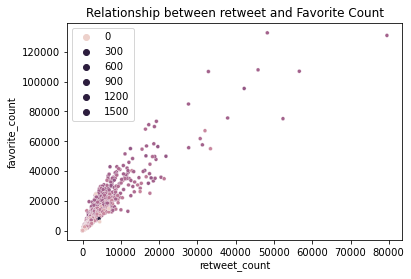

In [168]:
# create a scatter plot that shows relatioship between retweet_coun and favorite_count
ax=sns.scatterplot(data=df, x='retweet_count',y='favorite_count'
                   ,hue='rating_numerator',hue_norm=(5, 20), s=15)
ax.set(xlabel='retweet_count', ylabel='favorite_count', title='Relationship between retweet and Favorite Count')
plt.legend(loc='upper left')
plt.show()

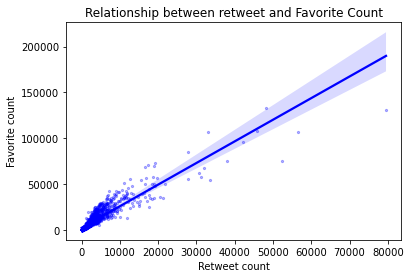

In [169]:
# A line draw from one diagonal to another so as to indicate the skwee of the scatter plot
ax = sns.regplot(x='retweet_count', y='favorite_count', data=df, color='b', scatter_kws={'s':5, 'alpha':.3}) 
ax.set(xlabel='Retweet count', ylabel='Favorite count', title='Relationship between retweet and Favorite Count')
plt.savefig('favorite_retweet_count.png')
plt.show()


From both graph above, The values in x axis increase as the value in Y axis, this indicate a positive relationship between the columns

### Insight 2
retweet and favourite count over time.

In [170]:

tweet_by_time=df[['timestamp','favorite_count','retweet_count']]
tweet_by_time=tweet_by_time.set_index('timestamp')
tweet_by_time.head()

,favorite_count,retweet_count
timestamp,,
2017-08-01 16:23:56+00:00,39467,8853
2017-08-01 00:17:27+00:00,33819,6514
2017-07-31 00:18:03+00:00,25461,4328
2017-07-30 15:58:51+00:00,42908,8964
2017-07-29 16:00:24+00:00,41048,9774


In [171]:

tweet_by_year=tweet_by_time.resample('A').median()
tweet_by_year

,favorite_count,retweet_count
timestamp,,
2015-12-31 00:00:00+00:00,1234.0,482.0
2016-12-31 00:00:00+00:00,4945.0,1561.0
2017-12-31 00:00:00+00:00,20750.5,4313.5


<AxesSubplot:xlabel='timestamp'>

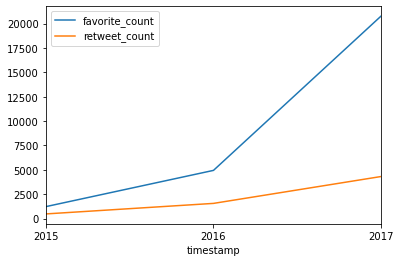

In [172]:
tweet_by_year.plot()

In [173]:
tweet_by_quarter=tweet_by_time.resample('Q').median()
tweet_by_quarter

,favorite_count,retweet_count
timestamp,,
2015-12-31 00:00:00+00:00,1234.0,482.0
2016-03-31 00:00:00+00:00,3042.5,1008.0
2016-06-30 00:00:00+00:00,4561.0,1451.0
2016-09-30 00:00:00+00:00,7036.0,2179.5
2016-12-31 00:00:00+00:00,11205.0,3172.0
2017-03-31 00:00:00+00:00,15098.5,3409.5
2017-06-30 00:00:00+00:00,22453.0,4875.0
2017-09-30 00:00:00+00:00,28469.0,5609.0


<AxesSubplot:xlabel='timestamp'>

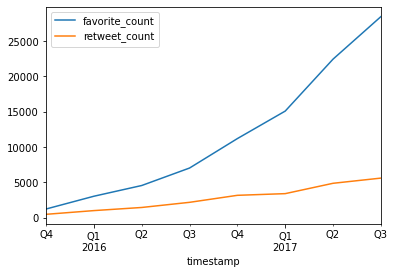

In [174]:
tweet_by_quarter.plot()

In [175]:
tweet_by_month=tweet_by_time.resample('MS').median()
tweet_by_month

,favorite_count,retweet_count
timestamp,,
2015-11-01 00:00:00+00:00,575.5,242.0
2015-12-01 00:00:00+00:00,1817.0,675.0
2016-01-01 00:00:00+00:00,2828.0,936.0
2016-02-01 00:00:00+00:00,2903.0,915.0
2016-03-01 00:00:00+00:00,3422.0,1099.0
2016-04-01 00:00:00+00:00,4257.0,1403.0
2016-05-01 00:00:00+00:00,4209.0,1268.0
2016-06-01 00:00:00+00:00,5661.0,1783.0
2016-07-01 00:00:00+00:00,5770.0,1814.0


<AxesSubplot:xlabel='timestamp'>

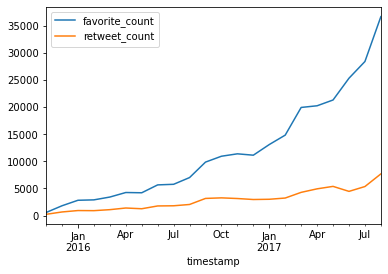

In [176]:
tweet_by_month.plot()

In [177]:
tweet_by_week=tweet_by_time.resample('W').median()
tweet_by_week.tail()

,favorite_count,retweet_count
timestamp,,
2017-07-09 00:00:00+00:00,28382.0,5134.0
2017-07-16 00:00:00+00:00,27973.5,5976.0
2017-07-23 00:00:00+00:00,30195.0,5159.0
2017-07-30 00:00:00+00:00,28268.0,5637.0
2017-08-06 00:00:00+00:00,33819.0,6514.0


<AxesSubplot:xlabel='timestamp'>

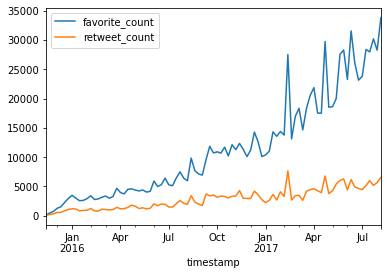

In [178]:
tweet_by_week.plot()

In [179]:
tweet_by_days=tweet_by_time.resample('D').median()
tweet_by_days.head(10)

,favorite_count,retweet_count
timestamp,,
2015-11-15 00:00:00+00:00,132.0,48.0
2015-11-16 00:00:00+00:00,194.0,92.0
2015-11-17 00:00:00+00:00,241.0,89.0
2015-11-18 00:00:00+00:00,368.0,135.0
2015-11-19 00:00:00+00:00,486.0,238.0
2015-11-20 00:00:00+00:00,509.0,279.0
2015-11-21 00:00:00+00:00,667.0,306.0
2015-11-22 00:00:00+00:00,516.0,223.0
2015-11-23 00:00:00+00:00,588.0,306.5


<AxesSubplot:xlabel='timestamp'>

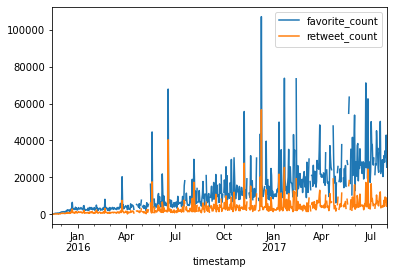

In [180]:
tweet_by_days.plot()

The illustration above shows the median values of favorite_count and retweet_count by year, quarter, month, week, and day. With this, we can see how these counts build up over time. The day-to-day counts are inconsistent, but start to show more consistent growth aggregated by week. Month, quarter, and year all show very consistent growth.



We can also see that favorites don't just happen more than retweets, their rate also grows faster. For example, looking at the quarterly aggregate, there are just under 3 times as many favorites as retweets in the first quarter, but over 5 times as many in the last two quarters of 2017 


I will like to use the tweet_by_week plot to best explain the retweet and favorite count over time

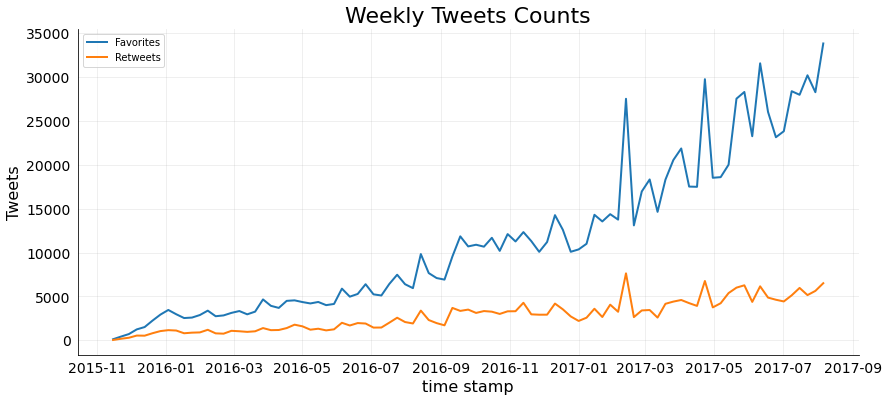

In [181]:
fig, ax=plt.subplots(1,1,figsize=(14,6))
plt.plot(tweet_by_week.index, tweet_by_week.favorite_count, linewidth=2.0, label='Favorites');
plt.plot(tweet_by_week.index, tweet_by_week.retweet_count, linewidth=2.0, label='Retweets');
ax.spines['top'].set_visible(False); # Getting rid of top spine
ax.spines['right'].set_visible(False); # Getting rid of right spine
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(axis='both', which='both', bottom=False, top=False, 
                labelbottom=True, left=False, right=False, labelleft=True);
plt.ylabel('Tweets', fontsize=16)
plt.xlabel('time stamp', fontsize=16)
plt.title('Weekly Tweets Counts', fontsize=22)
plt.grid(True, alpha=0.25);# grid makee graph easy to read
plt.legend()
plt.savefig('weekly_tweets_counts.png', bbox_inches='tight')
plt.show()

Now let compare dog stage

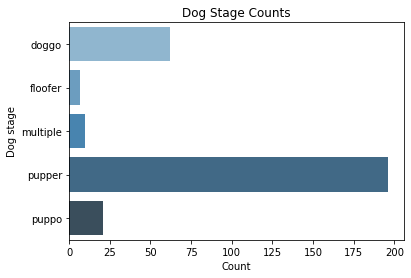

In [182]:
data=df.groupby('dog_stages').count()['tweet_id']
ax = sns.barplot(y=data.index, x=data.values, palette='Blues_d')
ax.set(xlabel='Count', ylabel='Dog stage', title='Dog Stage Counts')
plt.show()

from the bar chat above, it shows that pupper stage has the highest count with about 200 counts,while floofer stage has the lowest frequency

Comparing tweet from different source

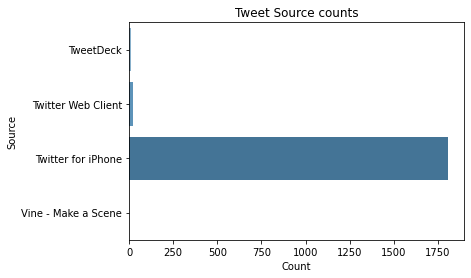

In [183]:
data=df.groupby('source').count()['tweet_id']
#print(data.values)
ax=sns.barplot(y=data.index,x=data.values,palette='Blues_d')
ax.set(xlabel='Count',ylabel='Source', title='Tweet Source counts')
plt.show()

it shows that the iphone user tweet most with about 1750 tweet counts

#### I will like to check for the rating distribution,by plotting a bar chart for its frequency

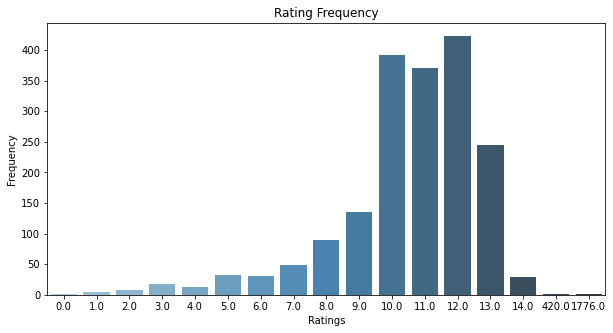

In [184]:
data=df.rating_numerator.value_counts()

fig, ax=plt.subplots(figsize=(10,5))
a=sns.barplot(x=data.index,y=data.values, palette='Blues_d')
ax.set(ylabel='Frequency',xlabel='Ratings',title='Rating Frequency')
plt.show()

C:\Users\kafayat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kafayat\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


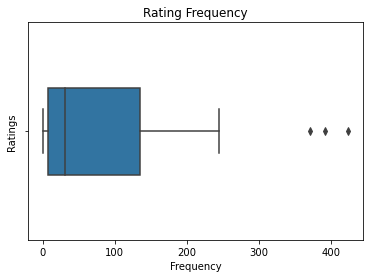

In [185]:
dd=df.rating_numerator.value_counts()
ax=sns.boxplot(data,orient='v', width=.4)
ax.set(ylabel='Ratings',xlabel='Frequency',title='Rating Frequency')
plt.show()

In [186]:

outlier_df=df[df.rating_numerator >400][['rating_numerator','name','jpg_url','text']]
outlier_df

,rating_numerator,name,jpg_url,text
678,1776.0,Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,This is Atticus. He's quite simply America af.
1583,420.0,NaN,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,Good dogg.


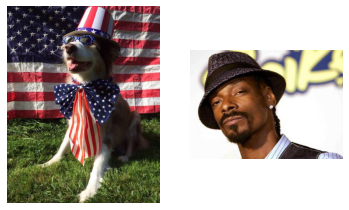

In [187]:
from PIL import Image
from io import BytesIO


if not os.path.exists('images'):
    os.makedirs('images')
fig=plt.figure()
c = 1
for index, row in outlier_df.iterrows():
    r = requests.get(row['jpg_url'])
    i = Image.open(BytesIO(r.content))
    i.save('images/' +  str(index) + '_' + str(row['rating_numerator']) + "_" + str(row['name']) + '.jpg')
    fig.add_subplot(1, 2, c)
    c += 1
    plt.imshow(i)
    plt.axis("off")
plt.show()

the rating numerator with 1776 is actually a dog while the second image is an artist picture, i suggest the artist picture to be remove

In [188]:
df.drop(index=1583, inplace=True)

In [189]:
df[df.rating_numerator>400][['tweet_id','name','rating_numerator','source','text','jpg_url']]

,tweet_id,name,rating_numerator,source,text,jpg_url
678,683498322573824003,Atticus,1776.0,TweetDeck,This is Atticus. He's quite simply America af.,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg


I will also like to check for the breed which is most popular

In [190]:
#let select breed with prediction >=0.5
popular_breed=df[df['al_confidence']>=0.5]
#check for shape
print('the size of breed with confidence >=0.5 is: {}'.format(popular_breed['tweet_id'].count()))
# creat a column name it popularity add retweet count and favorite count to generate the popularity column
popular_breed['popularity']=popular_breed['retweet_count']+popular_breed['favorite_count']
popular_breed=popular_breed[['tweet_id','breed','favorite_count','retweet_count','popularity']]
popular_breed.head()

the size of breed with confidence >=0.5 is: 863


C:\Users\kafayat\AppData\Local\Temp\ipykernel_22284\3801518506.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_breed['popularity']=popular_breed['retweet_count']+popular_breed['favorite_count']


,tweet_id,breed,favorite_count,retweet_count,popularity
2,666033412701032449,chihuahua,25461,4328,29789
4,666049248165822465,basset,41048,9774,50822
7,666055525042405380,pomeranian,56848,16716,73564
9,666058600524156928,pembroke,32467,7711,40178
10,666063827256086533,samoyed,31166,7624,38790


In [191]:
popular_breed.groupby('breed').popularity.mean().sort_values(ascending=False)

breed
saluki                 37440.000000
irish_water_spaniel    31264.000000
newfoundland           28980.000000
eskimo_dog             26517.571429
french_bulldog         25263.210526
                           ...     
miniature_schnauzer     1112.000000
english_springer        1068.000000
redbone                  836.000000
giant_schnauzer          332.000000
dandie_dinmont           312.000000
Name: popularity, Length: 97, dtype: float64

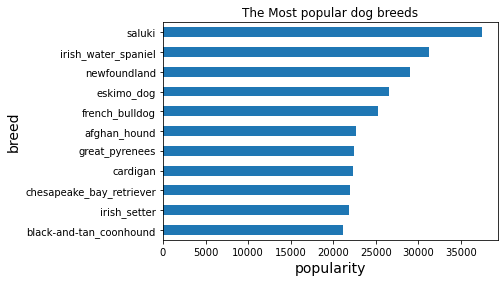

In [192]:
data_b=popular_breed.groupby('breed').popularity.mean().sort_values(ascending=False)[10::-1]

ax=data_b.plot(kind='barh', title='The Most popular dog breeds');
ax.set_ylabel('breed', fontsize=14)
ax.set_xlabel('popularity',fontsize=14)
plt.savefig('popular_dogbreed.jpg')
plt.show()

The most popular dogs breed is saluki

#### Does a certain dog stage has higher rating

In [193]:
d_stage=df.groupby('dog_stages').rating_numerator.mean()
d_stage

dog_stages
doggo       11.870968
floofer     12.000000
multiple    11.200000
pupper      10.607143
puppo       12.000000
Name: rating_numerator, dtype: float64

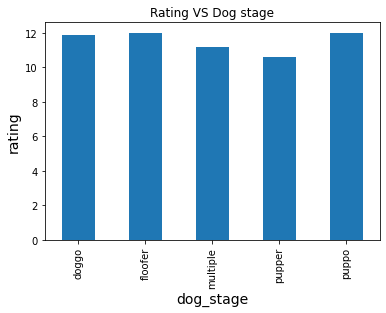

In [194]:
ax=d_stage.plot(kind='bar', title='Rating VS Dog stage');
ax.set_ylabel('rating', fontsize=14)
ax.set_xlabel('dog_stage',fontsize=14)
#plt.savefig('popular_dogbreed.jpg')
plt.show()

From the analysis above, floofer and puppo has highest ratings of 12. while the pupper stage has the least ratings of about 10.
and dogs with doggo stage tend to have ratings of about 11.87, multiple dog stage has 11.2